In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv('C:/Users/DELL/Downloads/Feature Engineering/Feature/Engineering/mobile_dataset.csv')
df.head(4)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2


In [3]:
x=df.iloc[:,:-1]

In [4]:
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [5]:
y=df['price_range']

In [7]:
y.head

<bound method NDFrame.head of 0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64>

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [9]:
order_rank_feture = SelectKBest(score_func=chi2,k=20)
order_feture = order_rank_feture.fit(x,y)

In [15]:
order_feture_1=pd.DataFrame(order_feture.scores_,columns=['Score'])
order_feture_1

,Score
0,14129.866576
1,0.723232
2,0.648366
3,0.631011
4,10.135166
5,1.521572
6,89.839124
7,0.745820
8,95.972863
9,9.097556


In [16]:
dfcolumns = pd.DataFrame(x.columns)

In [17]:
features_rank=pd.concat([dfcolumns,order_feture_1],axis=1)

In [19]:
features_rank.columns=['Feature','Score']

In [20]:
features_rank

,Feature,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [21]:
features_rank.nlargest(10,'Score')

,Feature,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


### Feature importance

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [30]:
model.feature_importances_

array([0.06234778, 0.02096934, 0.03339296, 0.01928131, 0.03331392,
       0.01824005, 0.03695883, 0.03374849, 0.03700995, 0.03305612,
       0.03321035, 0.04692051, 0.04968206, 0.38477482, 0.03516972,
       0.03360031, 0.03504618, 0.01440472, 0.01872401, 0.02014859])

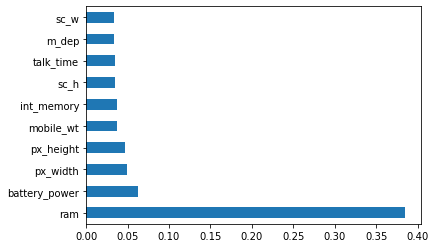

In [33]:
rank_feature=pd.Series(model.feature_importances_,index=x.columns)
rank_feature.nlargest(10).plot(kind='barh')
plt.show()

In [35]:
pip install seaborn

<AxesSubplot:>

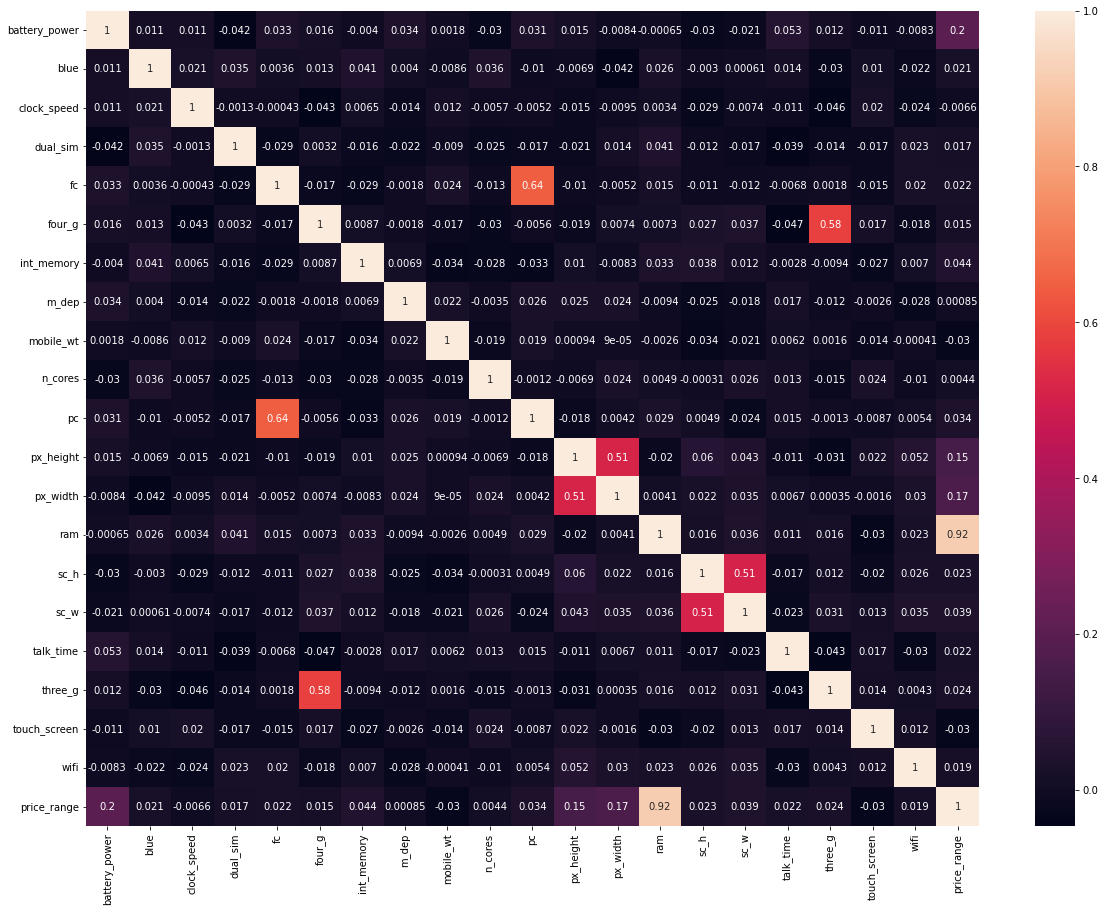

In [38]:
import seaborn as sns
corr=df.corr()
top_feture = corr.index
plt.figure(figsize=(20,15))
sns.heatmap(df[top_feture].corr(),annot=True)

In [49]:
treshold=0.5

In [45]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j])> threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [47]:
def correlation_1(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [50]:
correlation(df.iloc[:,:-1],treshold)

{'pc', 'px_width', 'sc_w', 'three_g'}

In [51]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(x,y)
mutual_data = pd.Series(mutual_info,index=x.columns)
mutual_data.sort_values(ascending=False)

ram              0.848375
mobile_wt        0.034002
px_height        0.028864
battery_power    0.025182
int_memory       0.024713
n_cores          0.020825
px_width         0.019236
dual_sim         0.019007
wifi             0.015533
sc_h             0.011975
blue             0.011124
sc_w             0.004252
clock_speed      0.003288
m_dep            0.000000
four_g           0.000000
fc               0.000000
talk_time        0.000000
three_g          0.000000
touch_screen     0.000000
pc               0.000000
dtype: float64